<a href="https://colab.research.google.com/github/NadeeshDisnaka/coding_project/blob/master/news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
!pip install wget
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from subprocess import check_output
import wget
#print(check_output(["ls", "../input"]).decode("utf8"))
if not os.path.exists('fake_news_1.csv'):
    wget.download('https://github.com/NadeeshDisnaka/coding_project/blob/master/fake_news_1.csv?raw=true')
if not os.path.exists('fake_news_2.csv'):
    wget.download('https://github.com/NadeeshDisnaka/coding_project/blob/master/fake_news_2.csv?raw=true')
if not os.path.exists('fake_news_3.csv'):
    wget.download('https://github.com/NadeeshDisnaka/coding_project/blob/master/fake_news_3.csv?raw=true')
fake_news = pd.DataFrame()
fake_news = fake_news.append(pd.read_csv("./fake_news_1.csv").dropna(subset=['title', 'text']), ignore_index = True)
fake_news = fake_news.append(pd.read_csv("./fake_news_2.csv").dropna(subset=['title', 'text']), ignore_index = True)
fake_news = fake_news.append(pd.read_csv("./fake_news_3.csv").dropna(subset=['title', 'text']), ignore_index = True)
fake_news.to_csv("./fake_news.csv")

### prepare fasttext models

In [0]:
!pip install fasttext
!pip install wget
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
import fasttext
model = fasttext.load_model("lid.176.bin")

--2019-10-20 19:47:12--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin.1’

lid.176.bin.1       100%[===================>] 125.18M  13.6MB/s    in 10s     

2019-10-20 19:47:23 (12.2 MB/s) - ‘lid.176.bin.1’ saved [131266198/131266198]



In [0]:
# test the fasttext system
vec = model.get_sentence_vector('Cohen attended Roslyn Elementary School and completed grades seven through\
                           nine at Herzliah High School, where his literary mentor Irving Layton taught,\
                           then transferred in 1948 to Westmount High School, where he studied music and poetry.\
                           He became especially interested in the poetry of Federico García Lorca.')
df=pd.DataFrame(data=vec.reshape([1,16]),
                columns=['c'+str(i) for i in range(vec.shape[0])])
df

c0        c1        c2  ...       c13       c14       c15
0  0.098627  0.021534 -0.257189  ... -0.045394 -0.103219  0.243237

[1 rows x 16 columns]

In [0]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [0]:
fake_news_data = pd.read_csv("fake_news.csv")
fake_news_data

Unnamed: 0  Unnamed: 0.1  ... shares  type
0               0             0  ...      0  bias
1               1             1  ...      0  bias
2               2             2  ...      0  bias
3               3             3  ...      0  bias
4               4             4  ...      0  bias
5               5             5  ...      0  bias
6               6             6  ...      0  bias
7               7             7  ...      0  bias
8               8             8  ...      0  bias
9               9             9  ...      0  bias
10             10            10  ...      0  bias
11             11            11  ...      0  bias
12             12            12  ...      0  bias
13             13            13  ...      0  bias
14             14            14  ...      0  bias
15             15            15  ...      0  bias
16             16            16  ...      0  bias
17             17            17  ...      0  bias
18             18            18  ...      0  bias
19             19            19  ...      0  bias
20             20            20  ...      0  bias
21             21            21  ...      0  bias
22             22            22  ...      0  bias
23             23            23  ...      0  bias
24             24            24  ...      0  bias
25             25            25  ...      0  bias
26             26            26  ...      0  bias
27             27            27  ...      0  bias
28             28            28  ...      0  bias
29             29            29  ...      0  bias
...           ...           ...  ...    ...   ...
12243       12243         12883  ...      0    bs
12244       12244         12884  ...      0    bs
12245       12245         12885  ...      0    bs
12246       12246         12886  ...      0    bs
12247       12247         12887  ...      0    bs
12248       12248         12888  ...      0    bs
12249       12249         12889  ...      0    bs
12250       12250         12890  ...      0    bs
12251       12251         12891  ...      0    bs
12252       12252         12892  ...      0    bs
12253       12253         12893  ...      0    bs
12254       12254         12894  ...      0    bs
12255       12255         12895  ...      0    bs
12256       12256         12896  ...      0    bs
12257       12257         12897  ...      0    bs
12258       12258         12898  ...      0    bs
12259       12259         12899  ...      0    bs
12260       12260         12900  ...    273    bs
12261       12261         12901  ...     61    bs
12262       12262         12902  ...     56    bs
12263       12263         12903  ...    172    bs
12264       12264         12904  ...    607    bs
12265       12265         12905  ...     34    bs
12266       12266         12906  ...    280    bs
12267       12267         12907  ...     14    bs
12268       12268         12908  ...     21    bs
12269       12269         12909  ...     72    bs
12270       12270         12910  ...    333    bs
12271       12271         12911  ...    197    bs
12272       12272         12912  ...    714    bs

[12273 rows x 22 columns]

## creating text to vector features

In [0]:
component_df = pd.DataFrame()
for row in fake_news_data.iterrows():
    frame = row[1]
    title_vector = model.get_sentence_vector(frame['title'])
    title_vector = title_vector.reshape([1,16])
    sentences = frame['text'].splitlines()
    text_vector = np.zeros([1,16])
    for sent in sentences:
        text_vector = np.add(text_vector , model.get_sentence_vector(sent).reshape([1,16]))
    vec =  np.add(title_vector, text_vector/len(sentences))
    df=pd.DataFrame(data=vec,
                columns=['c'+str(i) for i in range(vec.shape[1])])
    df = df.assign(score=round(frame['spam_score']))
    component_df = component_df.append(df, ignore_index=True)
feature_cols = ['c'+str(i) for i in range(16)]
X = component_df[feature_cols] # Features
y = component_df.score # Target variable

In [0]:
component_df

c0        c1        c2  ...       c14       c15  score
0      0.172918  0.029629 -0.396543  ... -0.107170  0.316828      0
1      0.107260 -0.002272 -0.391918  ... -0.140998  0.303928      0
2      0.076501  0.046845 -0.321646  ... -0.145269  0.246422      0
3      0.103281  0.115764 -0.476374  ... -0.217346  0.297040      0
4      0.029898  0.059540 -0.317916  ... -0.163250  0.253536      1
5      0.018240 -0.015118 -0.349616  ... -0.105118  0.239284      0
6      0.057127  0.062588 -0.367672  ... -0.116286  0.271234      1
7      0.010569  0.021581 -0.331020  ... -0.145481  0.202003      0
8      0.058520  0.009686 -0.282012  ... -0.105177  0.290970      0
9      0.052674  0.003685 -0.382551  ... -0.156995  0.268181      1
10    -0.100879 -0.037347 -0.167593  ... -0.066425  0.158396      0
11    -0.061052 -0.023859 -0.341371  ... -0.135973  0.252318      1
12     0.026918  0.064592 -0.333650  ... -0.104690  0.267260      0
13     0.012648  0.087900 -0.361349  ... -0.100174  0.156231      0
14     0.114202  0.057361 -0.386566  ... -0.148421  0.237696      0
15     0.042813 -0.018015 -0.355907  ... -0.145187  0.292716      0
16     0.004601  0.022308 -0.284713  ... -0.169000  0.147723      0
17     0.046268  0.016173 -0.332365  ... -0.161783  0.316496      0
18     0.070387  0.105628 -0.244248  ... -0.189769  0.168965      0
19     0.024479 -0.013723 -0.357619  ... -0.168141  0.245561      0
20     0.053755  0.016723 -0.387597  ... -0.161204  0.236664      0
21     0.067907  0.046907 -0.375168  ... -0.133383  0.286308      0
22    -0.004073  0.031311 -0.315444  ... -0.156276  0.187095      0
23     0.034822  0.049532 -0.316572  ... -0.141047  0.293279      0
24     0.001038  0.011508 -0.351246  ... -0.223045  0.255068      0
25    -0.082180 -0.011427 -0.263431  ... -0.152733  0.224110      0
26     0.066634  0.046565 -0.406696  ... -0.184650  0.299118      0
27     0.117597  0.024892 -0.343450  ... -0.224851  0.237798      0
28     0.035905  0.123577 -0.293976  ... -0.267143  0.242292      0
29    -0.007346  0.090519 -0.226946  ... -0.104694  0.077486      0
...         ...       ...       ...  ...       ...       ...    ...
12243 -0.054185  0.026099 -0.287039  ... -0.090430  0.237060      0
12244  0.082498  0.018668 -0.393997  ... -0.126935  0.327930      0
12245  0.020022  0.016461 -0.364451  ... -0.120436  0.273585      0
12246  0.011748  0.039218 -0.347703  ... -0.108315  0.310533      0
12247  0.023692  0.034269 -0.418090  ... -0.145110  0.236203      0
12248  0.107185  0.073113 -0.367740  ... -0.143970  0.310132      0
12249  0.039853 -0.035691 -0.414028  ... -0.125693  0.163402      0
12250 -0.023234  0.049820 -0.376494  ... -0.146783  0.231534      0
12251  0.027432  0.047413 -0.373698  ... -0.118697  0.288893      0
12252  0.055331  0.053121 -0.448081  ... -0.066661  0.242234      0
12253  0.075525  0.052190 -0.344133  ... -0.064504  0.286868      0
12254  0.049710  0.047239 -0.481006  ... -0.137836  0.355031      0
12255  0.049916  0.068866 -0.359479  ... -0.144662  0.242555      0
12256  0.084967  0.051709 -0.440267  ... -0.145636  0.332504      0
12257  0.054246  0.004996 -0.383771  ... -0.115348  0.247301      0
12258  0.037922  0.013375 -0.363359  ... -0.118657  0.235487      0
12259  0.062165  0.009689 -0.316217  ... -0.125665  0.278917      0
12260  0.054655  0.045287 -0.384610  ... -0.075168  0.309399      0
12261  0.033709 -0.041221 -0.347035  ... -0.102665  0.227405      0
12262  0.003999  0.047553 -0.287358  ... -0.101016  0.256163      0
12263  0.054364  0.035649 -0.284921  ... -0.134066  0.335803      0
12264  0.000009  0.026986 -0.374337  ... -0.090993  0.265815      0
12265  0.081450  0.018806 -0.394156  ... -0.116044  0.324763      0
12266  0.057439  0.038528 -0.356352  ... -0.107940  0.276677      0
12267  0.023905 -0.009967 -0.336750  ... -0.111112  0.257331      0
12268  0.032587  0.005287 -0.278048  ... -0.098961  0.233790      0
12269  0.028380  0.016852 -0.320205  ... -0.050163  0.218304      0
1

### splitting to training and test sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### creating the decision tree

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9584464964693101


In [0]:
!pip install graphviz
!pip install pydotplus

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fake_news.png')
Image(graph.create_png())

In [0]:
# calculating the cross validation accuracy
from sklearn.model_selection import cross_val_score
depths = list()
scores = list()
scores_std = list()
for depth in range(1,100,10):
    clf = DecisionTreeClassifier( max_depth=depth)
    score = cross_val_score(clf, X_train,y_train, cv=10)
    print("error rate: %0.2f (+/- %0.2f)" % (1-score.mean(), score.std() * 2))
    depths.append(depth)
    scores.append(np.mean(score))
    scores_std.append(np.std(score))

error rate: 0.02 (+/- 0.00)
error rate: 0.03 (+/- 0.01)
error rate: 0.04 (+/- 0.01)
error rate: 0.05 (+/- 0.01)
error rate: 0.05 (+/- 0.01)
error rate: 0.05 (+/- 0.01)
error rate: 0.05 (+/- 0.01)
error rate: 0.05 (+/- 0.01)
error rate: 0.05 (+/- 0.01)
error rate: 0.05 (+/- 0.01)


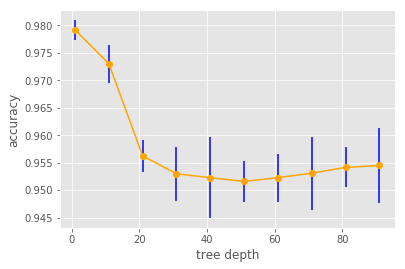

In [0]:
plt.errorbar(depths, scores, scores_std, linestyle='-', marker='o', ecolor = 'blue', color = 'orange')
plt.ylabel('accuracy')
plt.xlabel('tree depth')
plt.show()